# RETENCION CLIENTES EMPRESA DE TELEFONIA

# Abstract: 

La fuga de clientes, es comunmente conocida como "churn",en una Empresa de Telecomunicaciones.Es un desafío crítico que enfrentan las empresas de telecomunicaciones en la actualidad. 
La pérdida de clientes puede tener un impacto significativo en los ingresos y la rentabilidad de una empresa, 
por lo que entender los factores que contribuyen a la fuga de clientes es esencial para su supervivencia en un ambiente de suma competenciacomo es el de las telecomunicaciones.
 
# Contexto Comercial

El objetivo general es proporcionar una solución completa de inteligencia de clientes, 
que ayude a una empresa a anticipar y reducir la pérdida de clientes, conocer la siguiente 
mejor oferta y mejorar la experiencia para el cliente a través de múltiples canales. 

# Problema Comercial

El objetivo principal de este análisis es proporcionar insights valiosos que ayuden a la empresa a retener a sus
clientes y reducir la tasa de Renuncia.
Intentaremos  responder a algunas preguntas :
¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones?
¿Cuál es la distribución de la edad de los clientes?
¿Cómo se distribuyen los servicios contratados entre los clientes?
¿Cuál es la distribución de los cargos mensuales y totales de los clientes?
¿Qué porcentaje de clientes se encuentra satisfecho según las revisiones o encuestas?
¿Existe una relación entre la duración del contrato y la tasa de renuncia?
¿Cómo se relaciona la edad con la probabilidad de renuncia?
¿Los cargos mensuales varían según el tipo de servicio contratado?
¿Las revisiones de satisfacción están relacionadas con los servicios contratados?
¿Cómo interactúan la duración del contrato, los cargos mensuales y la satisfacción del cliente para influir en la renuncia?
¿Existen segmentos de clientes específicos con patrones de renuncia particulares basados en múltiples variables?
¿Cuál es la combinación óptima de servicios contratados que se asocia con la menor tasa de renuncia?

#  Hipótesis General:

"La tasa de renuncia de clientes en la empresa de telecomunicaciones está influenciada por una combinación de factores demográficos, patrones de consumo de servicios y niveles de satisfacción del cliente. A través del análisis de datos, buscamos identificar las variables clave que tienen un impacto significativo en la tasa de renuncia y proporcionar recomendaciones para reducir la renuncia de clientes y mejorar la retención."

# Contexto Analítico :


Contenido del Archivo de datos: Contiene 7043 filas (clientes) y 21 columnas (características). La columna "Churn" es nuestro variable target. Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre: Clientes que se fueron en el último mes. Columna Churn (Renuncia) Servicios a los que se ha suscrito cada cliente: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales. Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes Fuente

ATRIBUTOS:

customerID: Customer ID

gender : Si el cliente es hombre o mujer.

SeniorCitizen : Si el cliente es persona mayor o no (1, 0)

Partner: Si el cliente tiene pareja o no (Sí, No)

Dependents: Si el cliente tiene dependientes o no (Sí, No)

Tenure : (Tenencia) Número de meses que el cliente ha permanecido en la empresa.

PhoneService :Si el cliente tiene servicio telefónico o no (Sí, No)

MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)

InternetService : Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)

OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, No servicio de internet)

OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, No hay servicio de Internet)

DeviceProtection: Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, No servicio de internet)

StreamingTV: Si el cliente tiene streaming de TV o no (Sí, No, No servicio de internet)

StreamingMovies: Si el cliente tiene streaming de películas o no (Sí, No, No servicio de internet)

Contract: El plazo del contrato del cliente (mes a mes, un año, dos años)

PaperlessBilling: Si el cliente dispone de facturación electrónica o no (Sí, No)

PaymentMethod: El método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

MonthlyCharges:El importe cobrado a la cliente mensualmente.

TotalCharges: El importe total cargado a la cliente.

Churn: Si la cliente Canceló su suscripción o no (Sí o No)
Comenzaremos a responder las preguntas realizadas anteriormente:

# Exploratory Data Engeneering(EDA):

In [53]:
#Importamos  Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint

In [57]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/ProyectoCoderHouse/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df=  pd.read_csv(url,sep=",")
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [55]:
# Verificamos que Tipos de Datos son:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [60]:
#La columna de Senior Citizen, la transformamos en SI o NO
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [61]:
print(df['SeniorCitizen'])

0       No
1       No
2       No
3       No
4       No
        ..
7038    No
7039    No
7040    No
7041    Si
7042    No
Name: SeniorCitizen, Length: 7043, dtype: object


In [62]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [71]:
# ¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones?
clientes_renunciados = df[df['Churn'] == "Yes"].shape[0]
total_clientes = df.shape[0]
print(f"Cantidad de Clientes Activos en el mes {total_clientes}")
print(f"Cantidad de clientes que renunciaron: {clientes_renunciados}")
tasa_renuncia = (clientes_renunciados / total_clientes) * 100
print(f"Tasa de renuncia del mes {round(tasa_renuncia,1)} % ")

Cantidad de Clientes Activos en el mes 7043
Cantidad de clientes que renunciaron: 1869
Tasa de renuncia del mes 26.5 % 


In [38]:
# El 26,5% de los clientes renuciaron en el mes de evaluación 

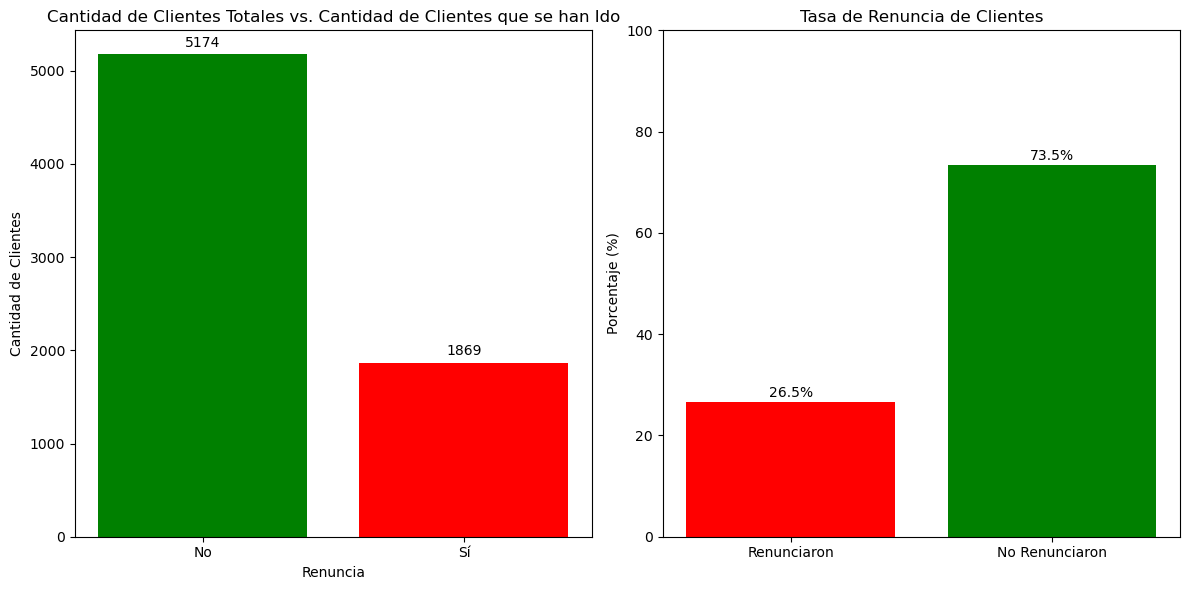

In [78]:
# Empezamos a visualizar la información de nuestro interés.
# Creamos  el primer gráfico de barras (Clientes Totales vs. Churn)
plt.figure(figsize=(12, 6))

# Subplot 1: Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido
plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
bars = plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xlabel('Renuncia')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(churn_counts.index, ['No', 'Sí'])

# Subplot 2: Tasa de Renuncia de Clientes
plt.subplot(1, 2, 2)
tasa_renuncia = (clientes_renunciados / total_clientes)*100

etiquetas = ['Renunciaron', 'No Renunciaron']
porcentajes = [tasa_renuncia, 100 - tasa_renuncia]
colores = ['red', 'GREEN']

plt.bar(etiquetas, porcentajes, color=colores)
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 1, f'{porcentaje:.1f}%', ha='center')

plt.title('Tasa de Renuncia de Clientes')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [40]:
# De un Total de 7043 clientes en este período de Tiempo renunciaron 1869 Clientes lo que representa el 26,5% del Total.

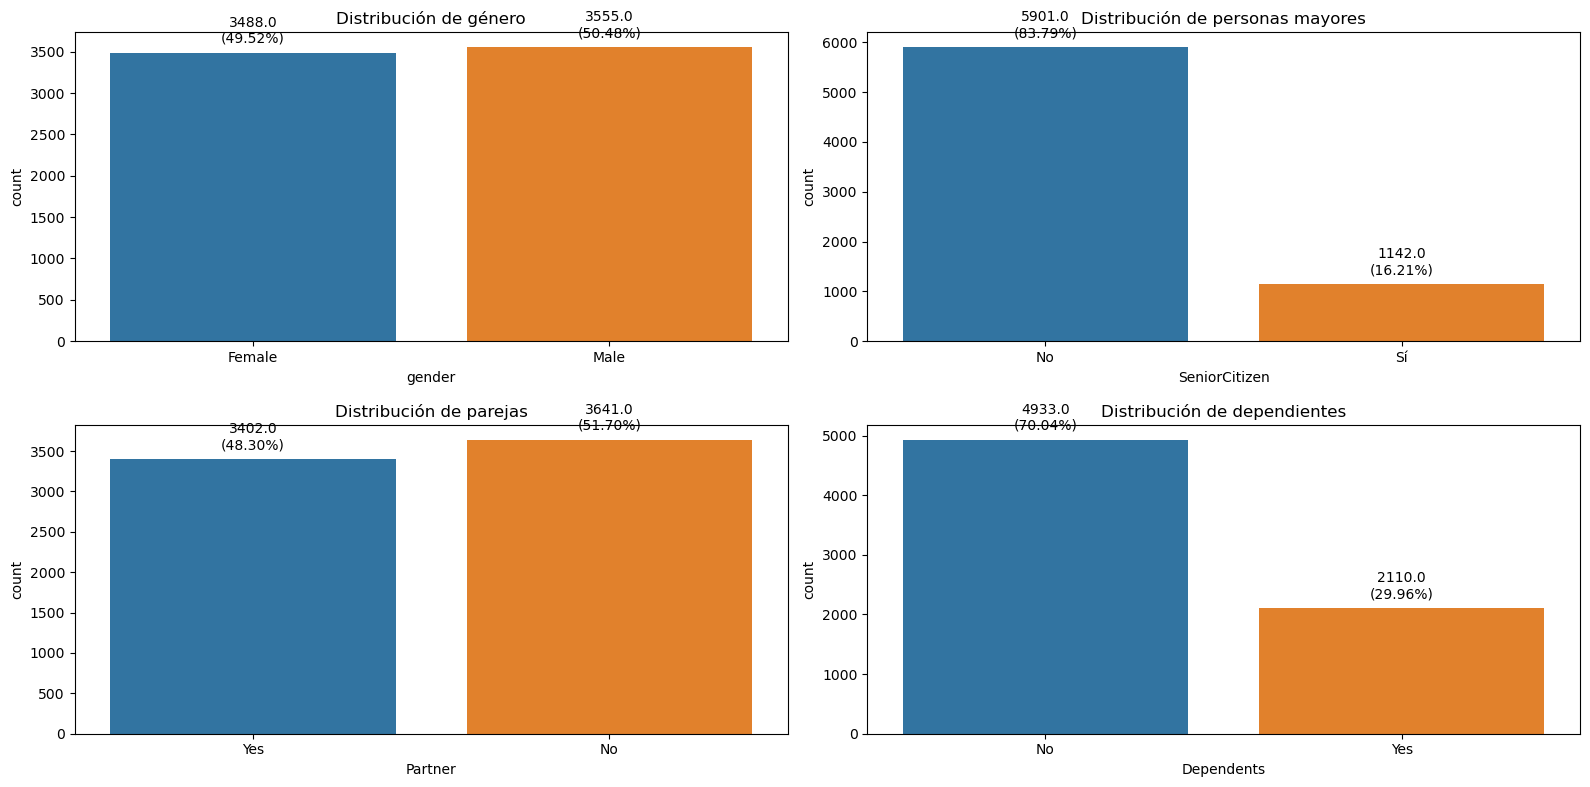

In [81]:
# 3. ¿Cuál es la proporción de género de los clientes?
#  Verificamos como se distribuyen los principales atributos
# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Gráfico de barras para "gender"
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género")

# Gráfico de barras para "SeniorCitizen"
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Gráfico de barras para "Partner"
sns.countplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas")

# Gráfico de barras para "Dependents"
sns.countplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()


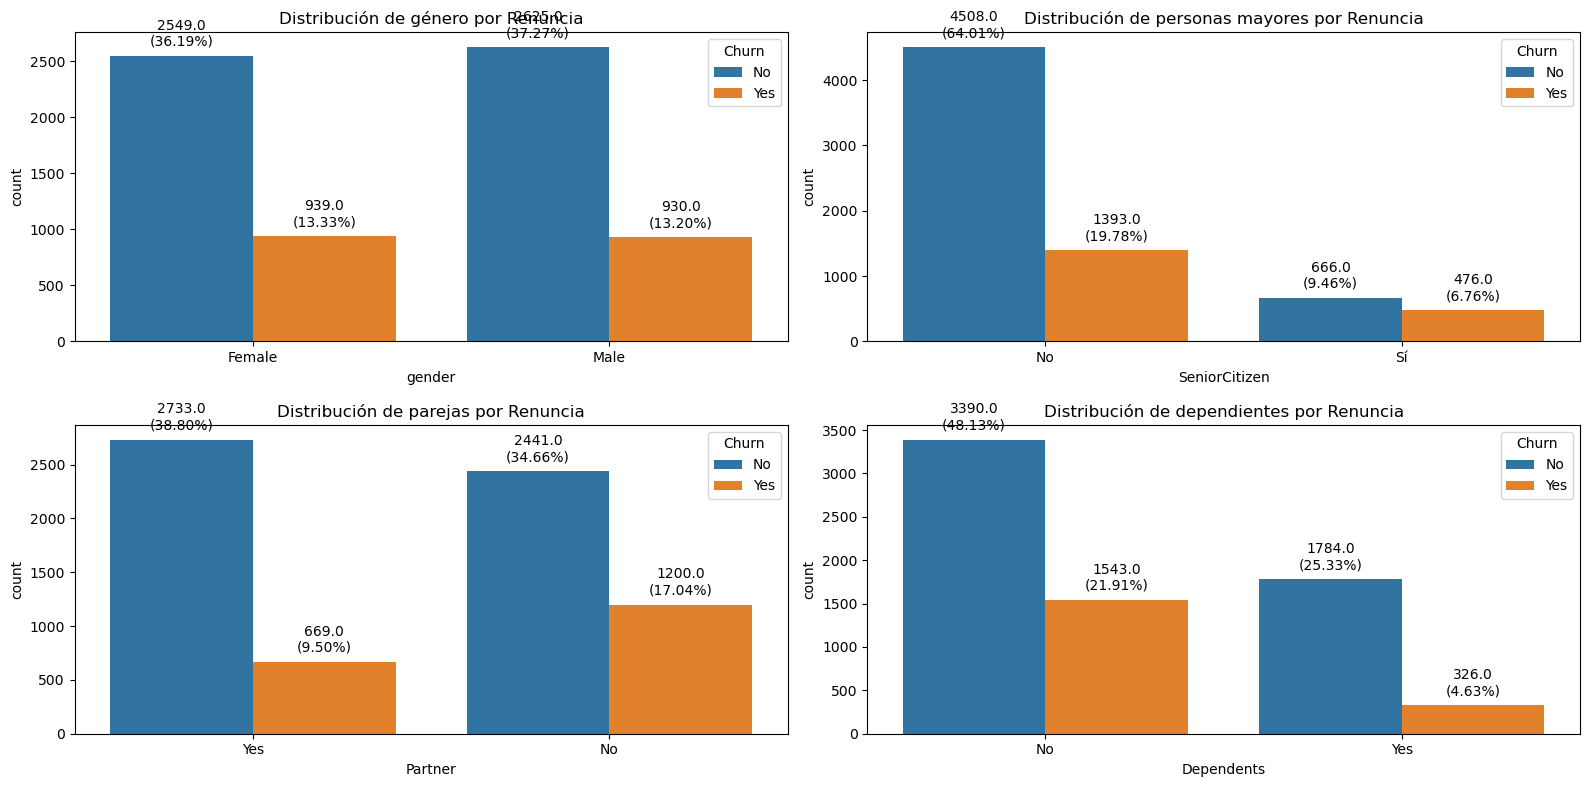

In [80]:
# Por atributo principal verificamos 
#1- En el caso de Sexo, no se ve un comportamiento determinante por sexo ( Cantidad de renunicias son similares).
#2- Cuando realiza,por Activos se verifica mayor renuncia que los pasivos
#3- Los que tienen pareja son los que en este mes mas renuncian 
#4 - Los que no tienen grupo familiar  son los que mayor renuncian

# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Crear gráficos de barras apilados para "gender" en función de "Churn"
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género por Renuncia")

# Crear gráficos de barras apilados para "SeniorCitizen" en función de "Churn"
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores por Renuncia")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Crear gráficos de barras apilados para "Partner" en función de "Churn"
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas por Renuncia")

# Crear gráficos de barras apilados para "Dependents" en función de "Churn"
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes por Renuncia")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()


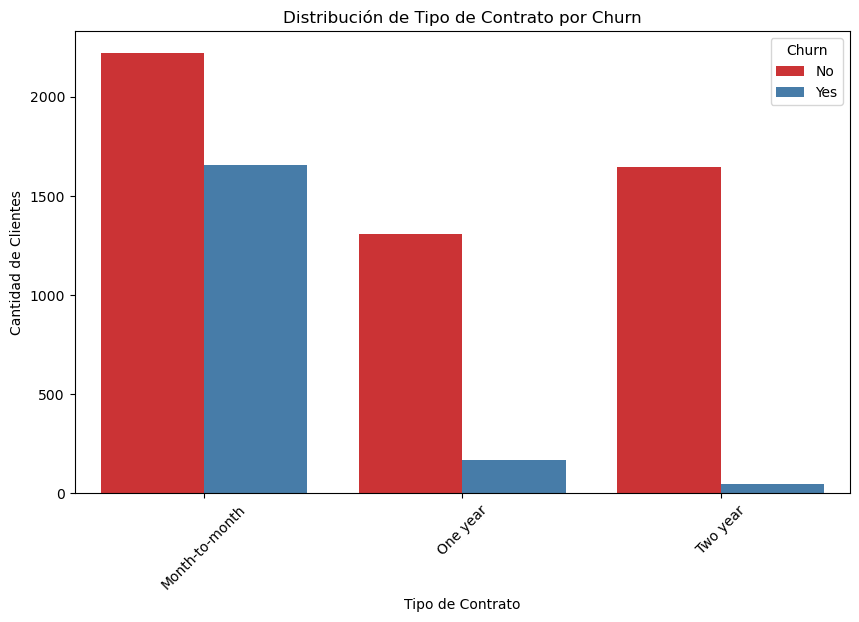

In [43]:
#Analizo la relación de tipo de contrato con la Renuncia(Churn). 
#Observamos que de los que se fueron los "Month-to-Month" contracts son más comúnes.

# Crear un gráfico de barras apiladas para el tipo de contrato en función de Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Tipo de Contrato por Churn')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()

<Axes: xlabel='tenure', ylabel='Churn'>

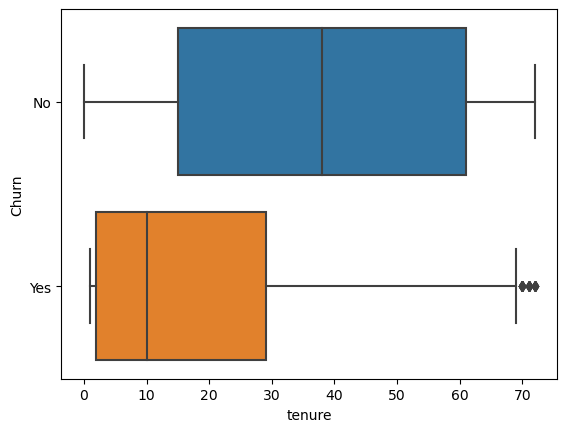

In [44]:
 #Analizo relación entre Tenure(Antiguedad como cliente) y Churn(Renuncia). 
#Claramente observamos que los que se han ido tenían menos tiempo. Vemos tendencia a fidelización. Importante.

sns.boxplot(x="tenure", y="Churn", data=df)




# Data Engeneering:

In [86]:
#  Verificamos si existen nulos en las columnas del Contamos el número de valores nulos en cada columna
# Concluímos que no hay
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [46]:
# Elimino el outlier para realizar el siguiente Boxplot que nos muestra Total Charges con Churn.

df= df.drop(df[df["TotalCharges"] > 600000].index)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

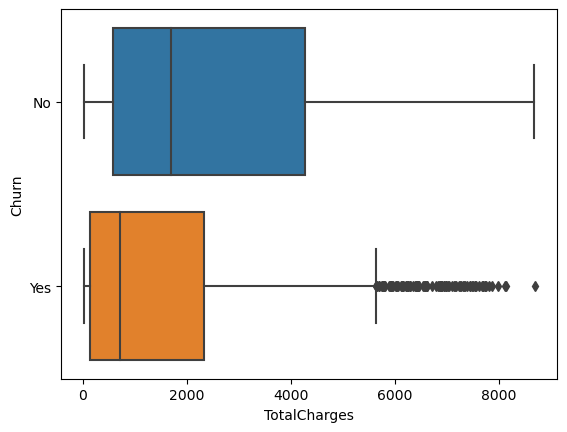

In [47]:
# Como el tiempo en la empresa y el cobro total estan correlacionados positivamente, es de esperar este resultado.
sns.boxplot(x="TotalCharges", y="Churn", data=df)

In [88]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df["Cant_Internet"]= df["InternetService"]+ df["OnlineSecurity"] + df["OnlineBackup"]+ df["DeviceProtection"]+ df["TechSupport"]+ df["StreamingTV"]+df["StreamingMovies"]


In [89]:
#Creo columna para ver quienes tienen internet + telefono.
df["pack"]= df["PhoneService"] + df["InternetService"]

<Axes: xlabel='pack', ylabel='Churn'>

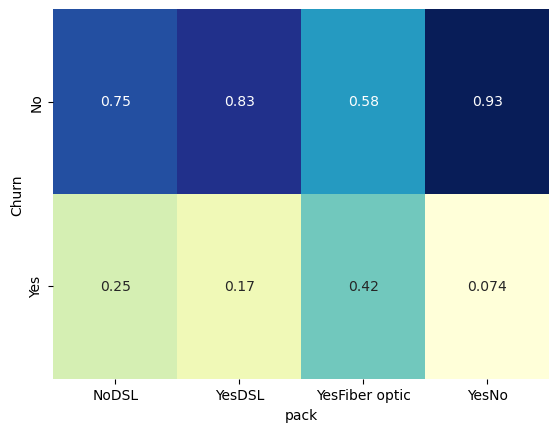

In [90]:
# En este caso no parece haber una relacion clara entre los que dejan
#y los principales servicios(telefono, internet). 
#Dejaron la empresa en un porcentaje mayor los que poseián internet + teléfono.

sns.heatmap(pd.crosstab(df.Churn, df.pack, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

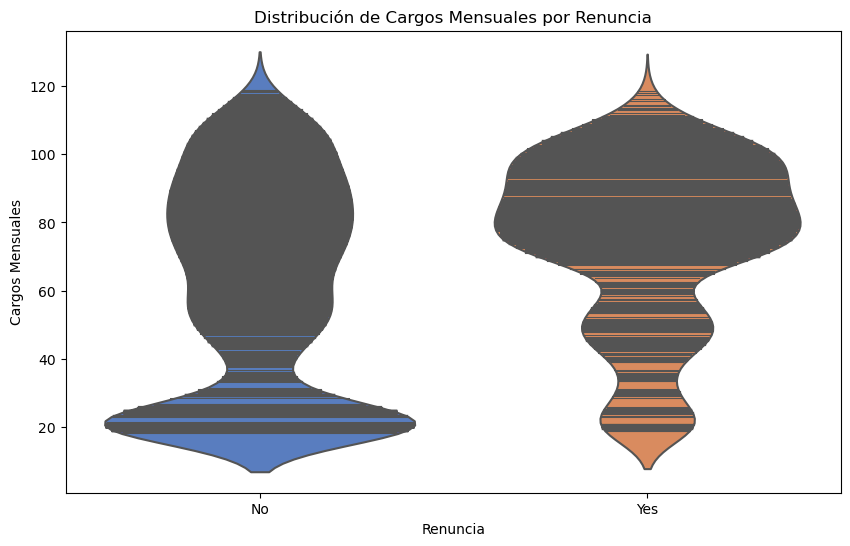

In [52]:
# Grafico de violín que muestra que hay menor  cantidad de cargos mensuales en aquellos  clientes que renuncian
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crea el  gráfico de violín
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette="muted", inner="stick")

# Personaliza el gráfico
plt.title('Distribución de Cargos Mensuales por Renuncia')
plt.xlabel('Renuncia')
plt.ylabel('Cargos Mensuales')
plt.show()


El gráfico muestra que los clientes que han renunciado (Yes) tienen cargos mensuales más bajos que los clientes que no han renunciado (No). Esto sugiere que los clientes que están satisfechos con su servicio están dispuestos a pagar más.